<a href="https://colab.research.google.com/github/Blueprint-GitHub/Study_Note/blob/main/Machine_Learning_Engineering_1~2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**머신러닝 엔지니어링(Machine Learning Engineering) by Andrly Burkov**\
**2023.12.23 ~**

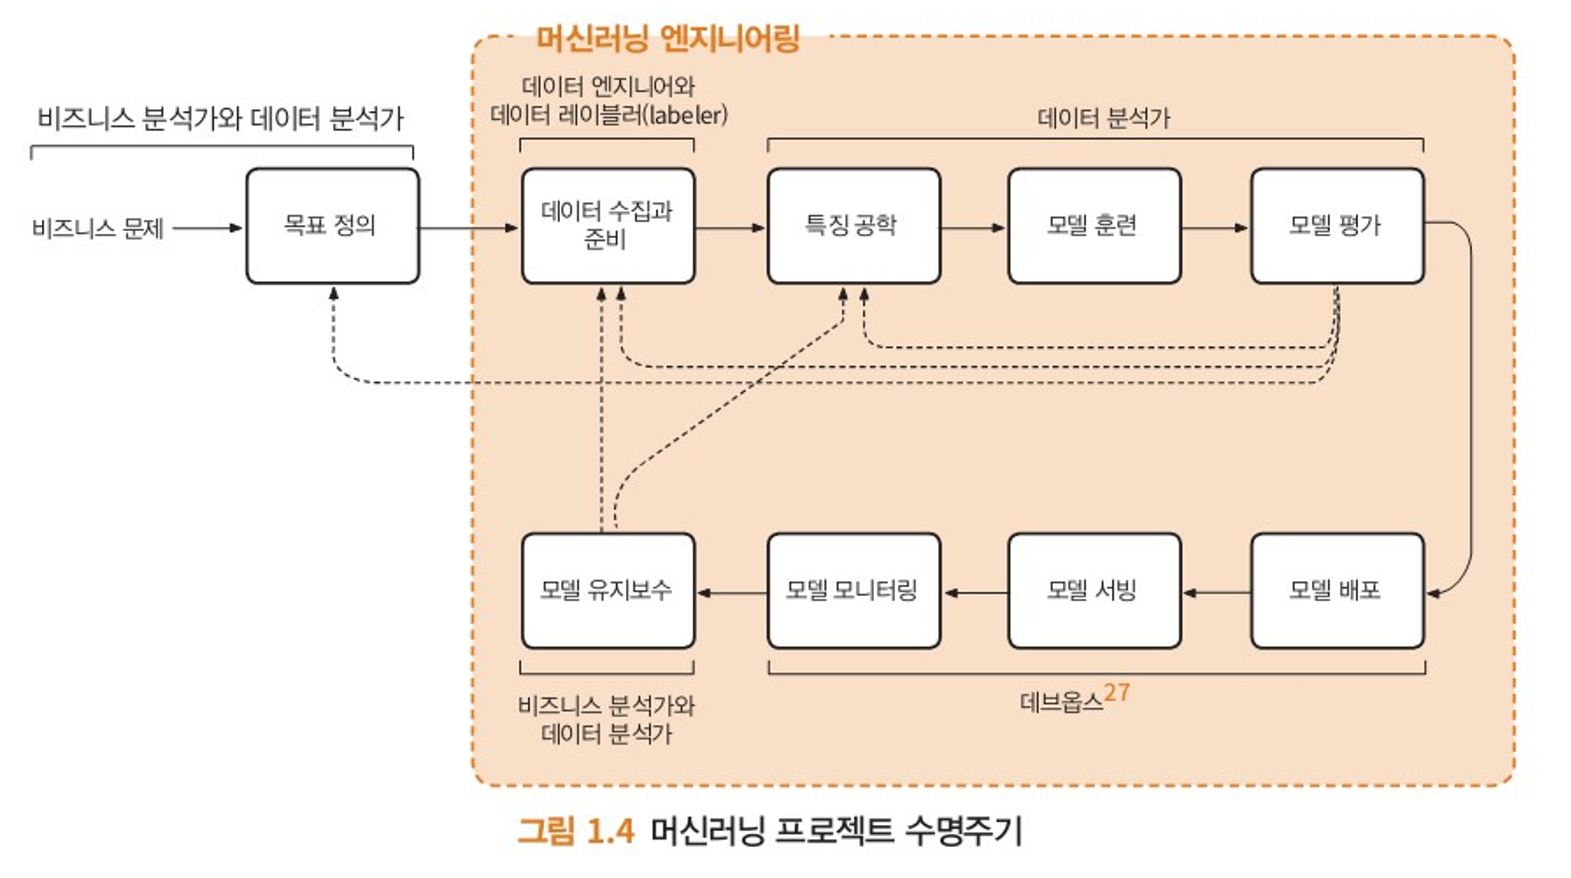

# **0. 도입**

### **용어 정리**

In [ ]:
지도 학습(Supervised Learning) : 특성 벡터 모음 X와 레이블 y로부터 X를 활용하여 y의 클래스를
                                 분류하거나 y의 값을 예측할 수 있는 선 또는 초평면을 찾는 학습
비지도 학습(Unsupervised Learning) : 레이블이 없는 특성 벡터 모음 X를 입력으로 받아서 이 벡터를
                                     다른 벡터로 변환하거나 그룹화하는 학습
준지도 학습(Semisupervised Learning) : 레이블링된 소수의 견본을 가지고 레이블링되지 않은 다수의
                                       견본을 레이블링하여 지도 학습으로 변환해 학습하는 방법
강화 학습(Reinforcement Learning) : 주어진 환경에서 에이전트가 최대한 많은 보상을 취할 수 있는
                                    최적의 정책(policy)를 학습하는 것.

모델 기반 학습(model_based) : 훈련 데이터를 통해 모델의 매개변수를 학습하는 알고리즘(SVM)
인스턴스 기반 학습(instance-based) : 전체 데이터 세트를 모델로 활용하는 학습(KNN)

직접적인 (directly)  데이터 : 최초에 주어진 특성(Feature) 모음
간접적인(indirectly) 데이터 : 데이터로부터 파생된(특성 확장) 데이터
원시 데이터(raw data)       : 워드 문서, JPEG 파일처럼 학습에 직접 적용할 수 없는 데이터
깔끔한 데이터(tidy data)    : pandas, numpy array처럼 raw data를 스프레드시트 형태로 변환한 데이터
원시 견본(raw example)      : 수치형 속성과 범주형 속성이 가공되지 않고 섞여있는 데이터셋

### **머신러닝이 필요한 순간**

In [ ]:
1. 문제가 너무 복잡해서 코딩으로 해결할 수 없을 때
  - 스팸 검출처럼 너무나 많은 조건문과 예외가 필요한 경우나 각 매개변수가 복잡하게
    상호 연관되어 있는 경우, 일반적인 프로그래밍으로는 제작 및 유지보수가 매우 어렵다.
2. 문제가 지속적으로 변할 때
  - 일부 문제(데이터)는 시간이 지남에 따라 변하기 때문에 지속적인 유지보수가 필요하지만
    코드가 간단하지 않다면 시간이 흐르며 오류 발생 가능성이 증가하고 상당한 비용이 발생할 수 있다.
3. 지각(perception) 문제일 때
  - 음성, 이미지, 동영상 인식과 같은 직관력이 필요한 문제들은 머신러닝을 사용하지 않고서는
    해결하기가 매우 어렵다.
4. 연구되지 않은 현상일 때
  - 머신러닝은 데이터의 패턴을 발견하는데 매우 효과적이므로 데이터의 의미에 대해
    완벽한 이해가 없을때도 데이터를 활용할 수 있다(추천 시스템)
5. 문제의 목적이 단순할 때
  - 머신러닝으로 엑셀을 만들기는 어렵지만, 예/아니오 등의 분류나 숫자 예측(회귀)와 같은
    문제들은 훨씬 효과적으로 해낼 수 있다.
6. 비용 효율적인 경우
  - 머신러닝은 크게 데이터 수집 및 정제, 모델 훈련, 파이프라인 배포로 이루어진 3단계에서
    대부분의 비용이 지출되므로 예측 가능하고 제한된 비용으로 서비스를 제공할 수 있다.

### **머신러닝이 필요하지 않은 순간**

In [ ]:
1. 시스템의 모든 조치나 결정 과정을 설명할 수 있어야 할 때. (Black box)
2. 유사한 상황에서 과거 동작과 비교하여 시스템의 동작 변화를 설명할 수 있어야 할 때.
3. 시스템에서 발생하는 오류에 따른 비용이 너무 높을 때(100%의 정확도를 달성할 수 없으므로)
4. 가능한 한 빨리 시장에 진출하기를 원할 때
5. 올바른 혹은 적절한 양의 데이터를 얻는 것이 너무 어렵거나 고비용일 때
6. 기존 방식의 소프트웨어를 사용해서 문제가 해결할 수 있을 때
7. 간단한 휴리스틱(어림짐작)이 합리적으로 잘 작동할 때
8. 시간이 지나도 자주 개선할 필요가 없는 시스템을 구축할 때

#**1. 목표 정의**

### **1) 머신러닝 프로젝트의 우선순위 결정**

In [ ]:
1. 머신러닝은 언제 적용해야 하는가?
  1) 머신러닝이 엔지니어링 프로젝트의 복잡한 부분을 대체할 수 있을때
    - 복잡한 규칙을 프로그래밍하는 대신에 머신러닝을 통해 모델이 규칙을
      학습하도록 하여 더욱 문제를 간단하게 만들 수 있다.
  2) 저렴하고 불완전한 예측을 얻는 것이 큰 이점이 있을때
    - 대부분의(쉬운) 작업은 시스템에 맡기고 어렵고 까다로운 부분만
      사람이 처리한다면 그 자체만으로도 많은 자원을 절약할 수 있다.

2. 머신러닝의 비용
  1) 문제의 난이도
    - 구현된 알고리즘이나 모델, 라이브러리를 사용할 수 있는지의 여부
    - 모델을 구축하고 실행하는 데 높은 계산 성능이 필요한지 여부
  2) 데이터 비용
    - 수동 레이블링(annotation)비용은 얼마인지 (이 경우 비용이 크게 증가한다.)
    - 얼마나 많은 데이터가 필요한지, 데이터를 자동으로 생성할 수 있는지.
  3) 요구되는 정확도
    - 모델의 허용 가능한 최저 정확도 수준은 얼마인지
      (높은 정확도를 필요로 할수록 비용이 기하급수적으로 증가한다.)
    - 잘못된 예측에 따르는 비용은 얼마인지(의학 또는 주식시장 등에 적용할 때)

### **2) 머신러닝 프로젝트의 복잡도 추정**

In [ ]:
1. 비교할 다른 프로젝트가 없다면 아래와 같은 정보들은 미리 알기 매우 어렵다.
  1) 필요한 품질을 실제로 달성할 수 있을지
  2) 필요한 품질을 얻기 위해 얼마나 많은 데이터가 필요할지
  3) 모델을 충분히 학습하고 일반화를 달성하는데 필요한 특성의 종류나 개수는 얼마나 되는지
  4) 딥러닝, 앙상블 모델의 경우 모델의 크기나 복잡도는 얼마나 필요한지
  5) 하나의 모델을 훈련하고 원하는 성능 수준에 도달하기까지 얼마나 걸릴지

2. 문제 단순화
  - 1000개의 클래스를 분류하는 문제가 있다면 10개를 먼저 분류 해본다던지,
    특정 고객이나 특정 지역으로 한정하여 예측을 수행한다던지 등의 방법으로
    사용 가능한 데이터를 분할하여 몇 개의 간단한 문제로 나누어 해결할 수 있다는 것이 확인되면
    자연스럽게 모든 데이터에 대해 해결할 수 있다는 결론으로 이어진다.

3. 비선형적 훈련 진행
  - 모델을 훈련할때 예측 오차의 80%는 처음에는 매우 빠르게 감소하지만,
    점차 감소하는 속도가 느려지게 된다. 따라서 이 점을 인지하고 지속적으로 추적하면
    프로젝트의 복잡성을 추정하는데 많은 도움을 준다.

### **3) 머신러닝 프로젝트의 목표 정의**

In [ ]:
1. 머신러닝 모델이 할 수 있는 작업
  - 자동화, 경고 또는 조언, 주석 달기, 데이터 추출, 추천,
    분류, 정량화(회귀), 합성, 입력 변환, 이상치 탐지, 질문 답변 등.

2. 성공적인 모델의 속성
  1) 입•출력 사양, 성능 요구사항 준수
  2) 조직에게 도움이 됨(비용 절감, 이익 증대)
  3) 사용자에게 도움이 됨(생산성 증대, 정서 향상)
  4) 과학적으로 엄격함
    - 즉 재현 가능해야 한다는 뜻이다. 훈련 데이터와 비슷한 분포를 가지고 있는
      데이터셋에서 모델은 같은 파라미터만 입력하면 비슷한 결과를 도출해낼 수 있다.

### **4) 머신러닝 팀 구성**

In [ ]:
Data Engineer : ETL(Extract, Transform, Load)를 담당하는 소프트웨어 엔지니어
                raw data를 분석 가능한 데이터로 변환하는 파이프라인을 생성하며
                데이터를 구조화하고 통합하는 방법을 설계한다.
DevOps Engineer : 머신러닝 모델의 배포, 관리 및 모니터링에 중점을 두고
                  개발과 운영 프로세스를 통합하고 자동화하는 역할을 맡는다.
Machine Learning Engineer : 머신러닝 모델의 설계, 개발, 훈련 및 배포를 담당하며
                            머신러닝 프레임워크를 사용하여 모델을 구현한다.
Software Engineer : 웹 애플리케이션, 모바일 앱, 대시보드 등과 같은 사용자 인터페이스를 개발하고
                    프론트엔드 및 백엔드 개발, 클라우드 서비스 구축과 같은 작업을 수행한다.

### **5) 머신러닝 프로젝트가 실패하는 이유**

In [ ]:
1. 숙련된 개발자 부족
  - 데이터 과학과 머신러닝 엔지니어링은 비교적 새로운 분야로써 이러한 일을 수행하기 위한
    표준화된 교육 과정이나 역량을 비교하는 방법들이 미비하여 실제 세상에 적용할만한
    프로젝트를 완수하는 비율이 꽤 낮다.

2. 경영진의 지원 부족
  - 머신러닝 프로젝트는 높은 불확실성 속에서 여러 실험을 거쳐야하므로 프로젝트의 진행도가
    가시화되기 어렵고 전문적인 지식 대한 경영진의 이해도 부족으로 프로젝트를 끝마칠때까지
    적절한 지원을 받기가 어렵다.

3. 데이터 인프라 부족
  - 데이터의 품질은 곧 머신러닝 프로젝트의 성공과 결부되어 있다고 할 수 있는데,
    실제로는 훈련 모델을 위한 양질의 데이터를 얻을 수 있는 인프라가 구축되어 있지 않은 경우가 많아
    모델을 훈련하기 위한 데이터 부족으로 프로젝트가 진행되지 못하는 경우도 발생한다.

4. 데이터 레이블링의 어려움
  - 대부분의 머신러닝 프로젝트에서는 레이블링된 데이터를 사용하는데, 데이터 레이블링은
    시간 집약적인 작업인데다 특정 데이터는 레이블링에 자격을 요구하므로(의학 데이터 등)
    데이터를 레이블링하거나 레이블링 도구를 개발하는 등에 상당한 시간과 자원을 소비하게 된다.

5. 실현 가능성에 대한 낙관
  - 머신러닝 프로젝트의 높은 비용 때문에 조직은 더욱 많은 것을 요구하게 되고
    높은 목표를 세우게 되는데, 이것은 결국 프로젝트의 완수와 시장 진입을
    지연시키게 되는 결과를 초래한다.